# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [129]:
!pip install citipy

In [130]:
! pip install requests

## Generate Cities List

In [176]:
# Dependencies
from config import (weather_api_key, g_key)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from citipy import citipy
from scipy.stats import linregress
from matplotlib import pyplot as plt
import random
import json
from pprint import pprint

# create an output data to hold the randomly selected cities
output_data = "output_data/cities.csv"

# To generate a floating-point number within each of their range
lat = np.random.uniform(low=-90.0, high=90.0, size=1400)
lon = np.random.uniform(low=-180.0, high=180.0, size=1400)

# Create empty lists to hold value
cities = []
lat_lon = []

# Use zip function to create an iterator for each city
zipped = zip(lat, lon)

# Create a for loop to loop through the nearest city and append them in the cities list
for city in zipped:
    city = citipy.nearest_city(city[0], city[1]).city_name
        
    if city not in cities:
        cities.append(city)
    

# Generate numbers of cities
print(len(cities))

592


In [177]:
# Generate cities list
list(cities)

['hobart',
 'lavrentiya',
 'sedona',
 'rikitea',
 'ullapool',
 'hithadhoo',
 'butaritari',
 'tuktoyaktuk',
 'atuona',
 'punta arenas',
 'fort-shevchenko',
 'saint george',
 'tual',
 'tasbuget',
 'cape town',
 'yellowknife',
 'bloemfontein',
 'longyearbyen',
 'hambantota',
 'havre-saint-pierre',
 'lasa',
 'morgan city',
 'tasiilaq',
 'chokurdakh',
 'sampit',
 'port macquarie',
 'atambua',
 'eldikan',
 'bati',
 'mataura',
 'petropavlovsk-kamchatskiy',
 'esperance',
 'saint-philippe',
 'imbituba',
 'kasempa',
 'college',
 'tuy hoa',
 'port alfred',
 'tura',
 'vao',
 'ushuaia',
 'muroto',
 'kodiak',
 'rocha',
 'upernavik',
 'teknaf',
 'bengkulu',
 'egvekinot',
 'vaitupu',
 'gizo',
 'angoche',
 'grand river south east',
 'tuatapere',
 'clyde river',
 'illoqqortoormiut',
 'ugoofaaru',
 'beckley',
 'port elizabeth',
 'ijaki',
 'prattville',
 'quesnel',
 'cobourg',
 'hurricane',
 'zlatoustovsk',
 'busselton',
 'nyurba',
 'barrow',
 'sitka',
 'nhulunbuy',
 'wukari',
 'dikson',
 'aksu',
 'puerto

In [178]:
cities_df = pd.DataFrame({'City':cities})

cities_df["Latitude"] = ""
cities_df["Longitude"] = ""

params = {"key": g_key}

# Loop through the cities_df and run a lat/long search for each city
for index, row in cities_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

#cities_df.to_csv("cities.csv", encoding="utf-8", index=False)

cities_df.head(100)

,City,Latitude,Longitude
0,hobart,,
1,lavrentiya,,
2,sedona,,
3,rikitea,,
4,ullapool,,
...,...,...,...
95,miri,,
96,madridejos,,
97,vaini,,
98,gumushane,,


In [179]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
base_url = url + "&appid=" + weather_api_key + "&units=imperial" + "&q="
query_url = base_url + city
response = requests.get(query_url)
response_json = response.json()
print(response_json)

{'coord': {'lon': 115.33, 'lat': -33.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 52.09, 'temp_min': 57, 'temp_max': 61, 'pressure': 1008, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 14.38, 'deg': 290}, 'clouds': {'all': 85}, 'dt': 1601473076, 'sys': {'type': 3, 'id': 2011706, 'country': 'AU', 'sunrise': 1601416620, 'sunset': 1601461211}, 'timezone': 28800, 'id': 2075265, 'name': 'Busselton', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [192]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
base_url = url + "&appid=" + weather_api_key + "&units=imperial" + "&q="

# Set empty lists to hold values
countries = []
cityname = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
lat = []
lon = []
city_count = 0
set_count = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through each city in the above created cities list
for city in cities:
    
    # Create search query, make request and store in json
    query_url = base_url + city
    response = requests.get(query_url)
    response_json = response.json()
    
    try:   
        # Based on the open weather api. Try to grab the cities and add them in the list
        cityname.append(response_json['name'])
        countries.append(response_json['sys']['country'])
        temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        date.append(response_json['dt'])
        lat.append(response_json['coord']['lat'])
        lon.append(response_json['coord']['lon'])
        
        # Make sure the cities are in different sets
        if city_count > 49:
            city_count = 1
            set_count += 1 
        
        else:
            city_count += 1

        print(f"Processing Record {city_count} of {set_count} | {city}")
        
        
    # Handle exceptions for city that is not available in the Open Weather API
    except:
        print("City not found. Skipping...")
    

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 1 | hobart
Processing Record 2 of 1 | lavrentiya
Processing Record 3 of 1 | sedona
Processing Record 4 of 1 | rikitea
Processing Record 5 of 1 | ullapool
Processing Record 6 of 1 | hithadhoo
Processing Record 7 of 1 | butaritari
Processing Record 8 of 1 | tuktoyaktuk
Processing Record 9 of 1 | atuona
Processing Record 10 of 1 | punta arenas
Processing Record 11 of 1 | fort-shevchenko
Processing Record 12 of 1 | saint george
Processing Record 13 of 1 | tual
City not found. Skipping...
Processing Record 14 of 1 | cape town
Processing Record 15 of 1 | yellowknife
Processing Record 16 of 1 | bloemfontein
Processing Record 17 of 1 | longyearbyen
Processing Record 18 of 1 | hambantota
Processing Record 19 of 1 | havre-saint-pierre
Processing Record 20 of 1 | lasa
Processing Record 21 of 1 | morgan city
Processing Record 22 of 1 | tasiilaq
Processing Record 23 of 1 | chokurdakh
Processing Record 24 of 1 | sampit
Pro

Processing Record 7 of 5 | torbay
Processing Record 8 of 5 | ligayan
Processing Record 9 of 5 | san juan
City not found. Skipping...
Processing Record 10 of 5 | mattru
Processing Record 11 of 5 | vestmanna
Processing Record 12 of 5 | isiolo
Processing Record 13 of 5 | airai
Processing Record 14 of 5 | tateyama
Processing Record 15 of 5 | sinnamary
Processing Record 16 of 5 | el tocuyo
Processing Record 17 of 5 | rio grande
Processing Record 18 of 5 | old orchard beach
Processing Record 19 of 5 | kutoarjo
Processing Record 20 of 5 | yuanping
Processing Record 21 of 5 | snezhnogorsk
Processing Record 22 of 5 | nabire
Processing Record 23 of 5 | severnoye
Processing Record 24 of 5 | bonthe
Processing Record 25 of 5 | frolovo
Processing Record 26 of 5 | port pirie
Processing Record 27 of 5 | saint-francois
Processing Record 28 of 5 | ambulu
Processing Record 29 of 5 | poso
Processing Record 30 of 5 | khatanga
Processing Record 31 of 5 | boulder
City not found. Skipping...
Processing Record

Processing Record 11 of 9 | broome
Processing Record 12 of 9 | grindavik
Processing Record 13 of 9 | sikasso
Processing Record 14 of 9 | neftekamsk
Processing Record 15 of 9 | puerto palomas
Processing Record 16 of 9 | sargatskoye
Processing Record 17 of 9 | chute-aux-outardes
Processing Record 18 of 9 | sistranda
Processing Record 19 of 9 | ghiror
City not found. Skipping...
Processing Record 20 of 9 | contamana
Processing Record 21 of 9 | raudeberg
Processing Record 22 of 9 | urucara
Processing Record 23 of 9 | asau
Processing Record 24 of 9 | beloha
Processing Record 25 of 9 | port lincoln
Processing Record 26 of 9 | newton
Processing Record 27 of 9 | galle
Processing Record 28 of 9 | kruisfontein
City not found. Skipping...
Processing Record 29 of 9 | caraz
Processing Record 30 of 9 | los llanos de aridane
Processing Record 31 of 9 | bambous virieux
Processing Record 32 of 9 | riyadh
Processing Record 33 of 9 | fujin
Processing Record 34 of 9 | devrek
Processing Record 35 of 9 | th

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [227]:
# Create DataFrame
city_new_df = pd.DataFrame({
    'City': cityname,
    'Lat': lat,
    'Lng': lon,
    'Max Temp': temp,
    'Humidity': humidity,
    'Wind Speed': wind_speed,
    'Cloudiness': cloudiness,
    'Country': countries,
    'Date': date
})
city_new_df

,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Hobart,-42.88,147.33,60.80,51,16.11,0,AU,1601635838
1,Lavrentiya,65.58,-171.00,40.46,94,10.16,100,RU,1601636119
2,Sedona,34.87,-111.76,71.60,7,17.22,1,US,1601636120
3,Rikitea,-23.12,-134.97,72.54,81,19.13,0,PF,1601636121
4,Ullapool,57.90,-5.16,54.00,76,11.99,92,GB,1601636121
...,...,...,...,...,...,...,...,...,...
528,Olafsvik,64.89,-23.71,44.11,79,20.51,100,IS,1601636553
529,Jacareacanga,-6.22,-57.75,74.07,91,2.30,97,BR,1601636554
530,Hvide Sande,56.00,8.13,63.00,93,12.75,75,DK,1601636555
531,Husavik,66.04,-17.34,24.80,85,3.36,100,IS,1601636555


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [228]:
# Check if any city's humidity > 100%
city_new_2_df = city_new_df.query("Humidity > 100")

city_new_2_df = city_new_2_df.reset_index(drop=True)

city_new_2_df

,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date


In [229]:
# Based on the above data frame, there is no city that has a humidity number greater than 100%


In [230]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = city_new_df['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidity is: {upperq}")
print(f"The interquartile range of humidity is: {iqr}")
print(f"The the median of humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of humidity is: 58.0
The upper quartile of humidity is: 86.0
The interquartile range of humidity is: 28.0
The the median of humidity is: 75.0 
Values below 16.0 could be outliers.
Values above 128.0 could be outliers.


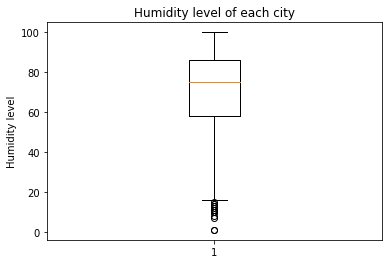

In [231]:
# Generate a box plot of the humidity of each city
humidity = city_new_df['Humidity']

fig1, ax1 = plt.subplots()
ax1.set_title('Humidity level of each city')
ax1.set_ylabel('Humidity level')
ax1.boxplot(humidity)
plt.show()

In [232]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index. Based on the above analysis, any value lower than 16 could be outliers.
clean_city_data = city_new_df.query("Humidity >= 16")

clean_city_data = clean_city_data.reset_index(drop=True)

clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Hobart,-42.88,147.33,60.80,51,16.11,0,AU,1601635838
1,Lavrentiya,65.58,-171.00,40.46,94,10.16,100,RU,1601636119
2,Rikitea,-23.12,-134.97,72.54,81,19.13,0,PF,1601636121
3,Ullapool,57.90,-5.16,54.00,76,11.99,92,GB,1601636121
4,Hithadhoo,-0.60,73.08,84.24,65,5.35,80,MV,1601636122
...,...,...,...,...,...,...,...,...,...
509,Olafsvik,64.89,-23.71,44.11,79,20.51,100,IS,1601636553
510,Jacareacanga,-6.22,-57.75,74.07,91,2.30,97,BR,1601636554
511,Hvide Sande,56.00,8.13,63.00,93,12.75,75,DK,1601636555
512,Husavik,66.04,-17.34,24.80,85,3.36,100,IS,1601636555


In [233]:
# Make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data.to_csv("output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

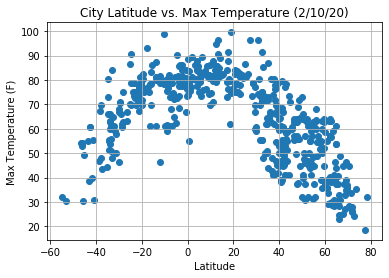

In [261]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2/10/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

#### The max temperatures are higher between latitude 0-20 and gradually reduces with the latitude absolute value increases.

## Latitude vs. Humidity Plot

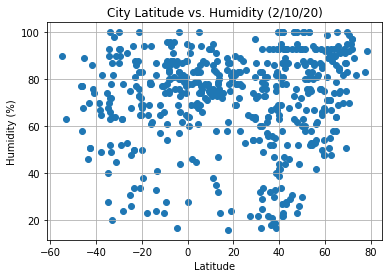

In [235]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2/10/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Humidity.png")

# Show plot
plt.show()

##### The humidity has no obvious linear relationships with the latitude.

## Latitude vs. Cloudiness Plot

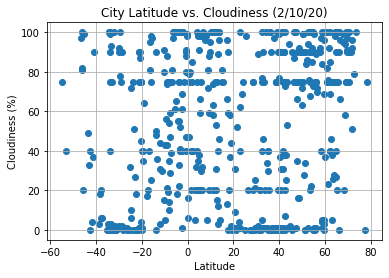

In [236]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2/10/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

##### The cloudiness has no obvious linear relationships with the latitude.

## Latitude vs. Wind Speed Plot

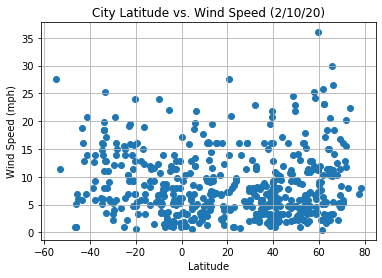

In [248]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2/10/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

##### The wind speed has no obvious linear relationships with the latitude.

## Linear Regression

In [241]:
# Create Northern and Southern Hemisphere dataframes
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0.00]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0.00]

northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
1,Lavrentiya,65.58,-171.00,40.46,94,10.16,100,RU,1601636119
3,Ullapool,57.90,-5.16,54.00,76,11.99,92,GB,1601636121
5,Butaritari,3.07,172.79,80.38,69,15.95,5,KI,1601636123
6,Tuktoyaktuk,69.45,-133.04,36.88,95,4.56,91,CA,1601636123
9,Fort-Shevchenko,44.51,50.26,70.88,29,11.86,2,KZ,1601636125


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8136576276971609


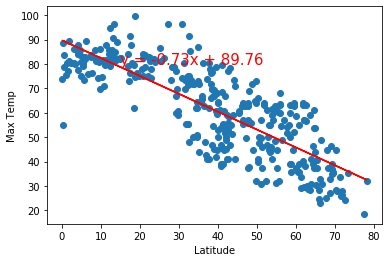

<Figure size 432x288 with 0 Axes>

In [249]:
# Calculate the correlation coefficient and linear regression model 
from sklearn import datasets

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15, 80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {rvalue}")

plt.show()

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6916055190594105


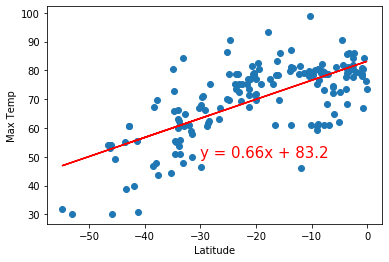

<Figure size 432x288 with 0 Axes>

In [254]:
# Calculate the correlation coefficient and linear regression model 
from sklearn import datasets

x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {rvalue}")

plt.show()

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

##### The max temperature has a strong negative correlation to the latitude in Northern Hemisphere. But has a less strong positive correlation in Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11958518724414789


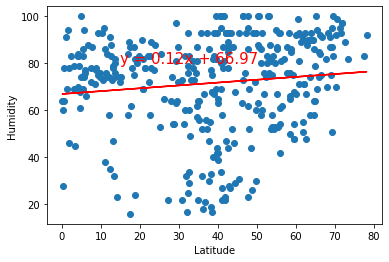

<Figure size 432x288 with 0 Axes>

In [252]:
# Calculate the correlation coefficient and linear regression model 
from sklearn import datasets

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15, 80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue}")

plt.show()

# Save the figure
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14674004182994774


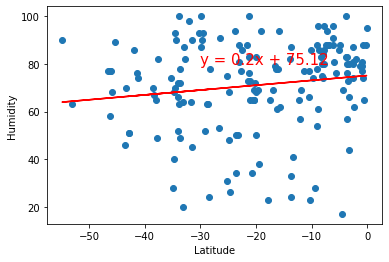

<Figure size 432x288 with 0 Axes>

In [255]:
# Calculate the correlation coefficient and linear regression model 
from sklearn import datasets

x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue}")

plt.show()

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

##### The humidity level and latitude does not seem to have an obvious correlation for either Northern or Sourthern Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17191578998481982


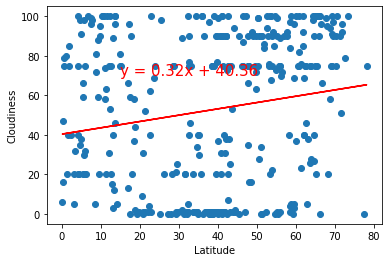

<Figure size 432x288 with 0 Axes>

In [256]:
# Calculate the correlation coefficient and linear regression model 
from sklearn import datasets

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15, 70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue}")

plt.show()

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19277610938555723


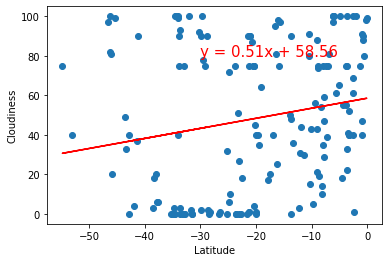

<Figure size 432x288 with 0 Axes>

In [257]:
# Calculate the correlation coefficient and linear regression model 
from sklearn import datasets

x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue}")

plt.show()

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

##### The cloudiness and latitude does not seem to have an obvious correlation for either Northern or Sourthern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13427842927828187


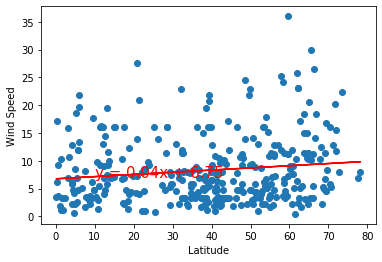

<Figure size 432x288 with 0 Axes>

In [259]:
# Calculate the correlation coefficient and linear regression model 
from sklearn import datasets

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue}")

plt.show()

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.31290664378758004


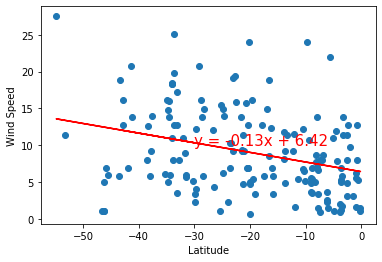

<Figure size 432x288 with 0 Axes>

In [260]:
# Calculate the correlation coefficient and linear regression model 
from sklearn import datasets

x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue}")

plt.show()

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

##### The wind speed and latitude does not seem to have an obvious correlation for either Northern or Sourthern Hemisphere. 